In [308]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [309]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

df=pd.read_csv(url)

print(df)

      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

In [310]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

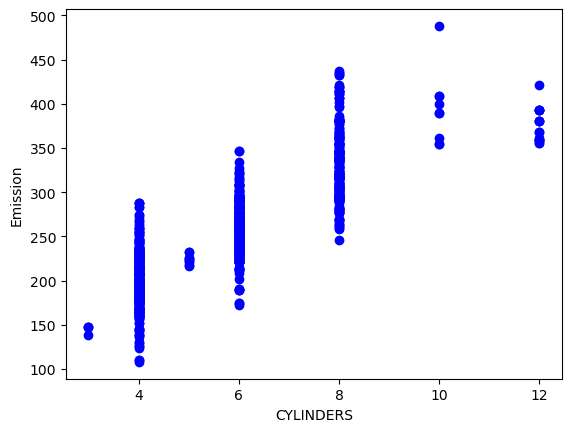

In [311]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

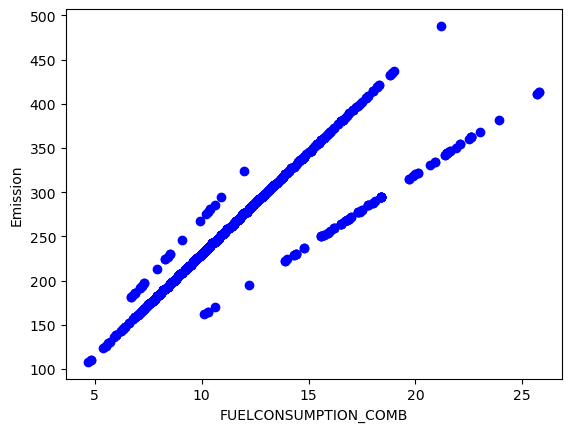

In [312]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [313]:
print(df.columns)

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


I want to use 'FUELTYPE' but it's in string format, this will cause issues.

In [315]:
df['FUELTYPE'] = pd.factorize(df['FUELTYPE'])[0]

In [316]:
#Now it's in numerical format
print(df['FUELTYPE'])

0       0
1       0
2       0
3       0
4       0
       ..
1062    2
1063    2
1064    2
1065    2
1066    2
Name: FUELTYPE, Length: 1067, dtype: int64


In [317]:
X = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS',
        'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']]
y = df["CO2EMISSIONS"]

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [319]:
print(X.to_string)

<bound method DataFrame.to_string of       MODELYEAR  ENGINESIZE  CYLINDERS  FUELTYPE  FUELCONSUMPTION_CITY  \
0          2014         2.0          4         0                   9.9   
1          2014         2.4          4         0                  11.2   
2          2014         1.5          4         0                   6.0   
3          2014         3.5          6         0                  12.7   
4          2014         3.5          6         0                  12.1   
...         ...         ...        ...       ...                   ...   
1062       2014         3.0          6         2                  13.4   
1063       2014         3.2          6         2                  13.2   
1064       2014         3.0          6         2                  13.4   
1065       2014         3.2          6         2                  12.9   
1066       2014         3.2          6         2                  14.9   

      FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG 

In [320]:
model = LinearRegression()

Now we need to scale the data so that it fit's better together

In [322]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()
	
	# Fit and transform
X_scaled_train = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [323]:
model.fit(X_scaled_train,y_train)

LinearRegression()

In [324]:
print ('Coefficients: ', model.coef_) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',model.intercept_)

Coefficients:  [  0.          14.21318416   7.04147542  -7.83745997 -73.81613187
 -25.19124291 115.34655706 -24.78336156]
Intercept:  257.25674091441965


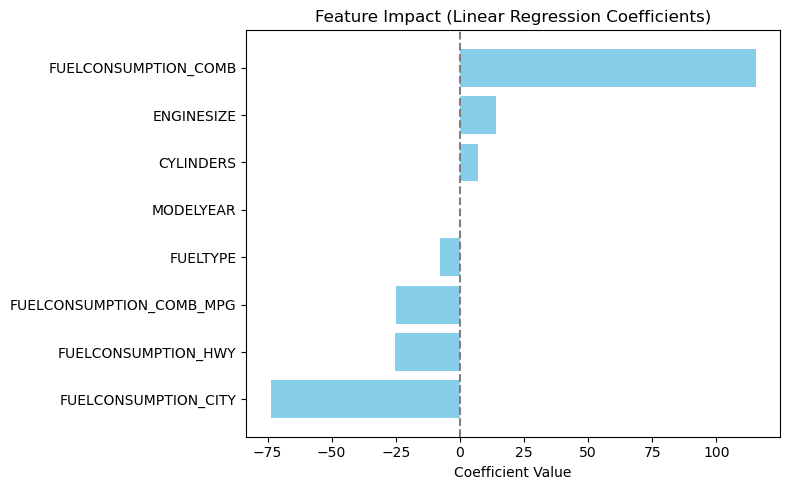

In [325]:
coefficients = model.coef_
features = X.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=True)


plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Feature Impact (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

As we can see some input variables actually have a counter effect, so let's remove them. But before let's check the score to compare for when we do remove them

In [327]:
X_scaled = scaler.fit_transform(X)

print(model.score(X_scaled,y))

0.8988530602858108


In [328]:
X = df[['MODELYEAR', 'ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']]
y = df["CO2EMISSIONS"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
	
X_scaled_train = scaler.fit_transform(X_train)

model_2 = LinearRegression()

model_2.fit(X_scaled_train,y_train)

X_scaled = scaler.fit_transform(X)

print(model_2.score(X_scaled,y))

0.8636828435667447


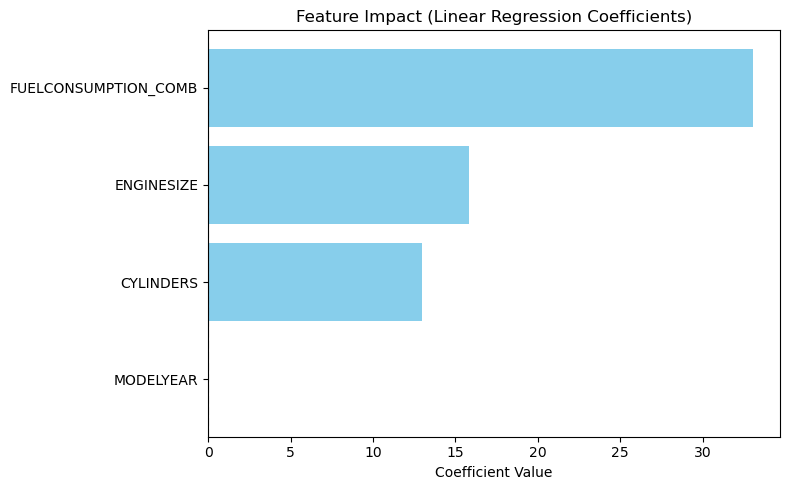

In [350]:
coefficients = model_2.coef_
features = X.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=True)


plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Feature Impact (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()